In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
np.random.seed(1406)
plt.rc('figure', figsize=(8, 6))

In [2]:
SIZE = 1000000

### 1.1 Генератор случайных чисел для равномерного распределения на [0,1]

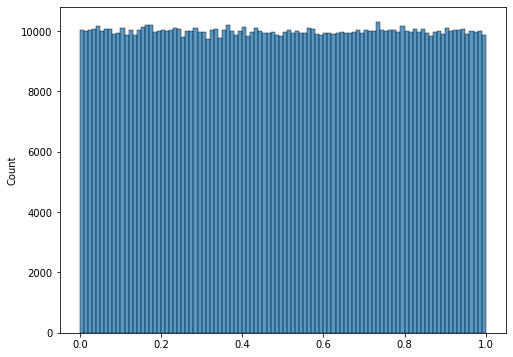

In [3]:
even_dist = np.random.random(size=SIZE)
sns.histplot(even_dist, bins=100)
plt.show()

### 1.2 Генератор случайных чисел для закона распределения, заданного непрерывной функцией распределения (нормальное, показательное, гамма-, Стьюдента,….).

In [4]:
#### 1.2.1 Normal distribution
norm_dist = np.random.standard_normal(size=SIZE)
#### 1.2.2 Exponential distribution
exp_dist = np.random.exponential(size=SIZE)
#### 1.2.3 Gamma distribution
gamma_dist = np.random.gamma(3, scale=2.0, size=SIZE)
#### 1.2.4 t-Student distribution
student_dist = np.random.standard_t(10, size=SIZE)

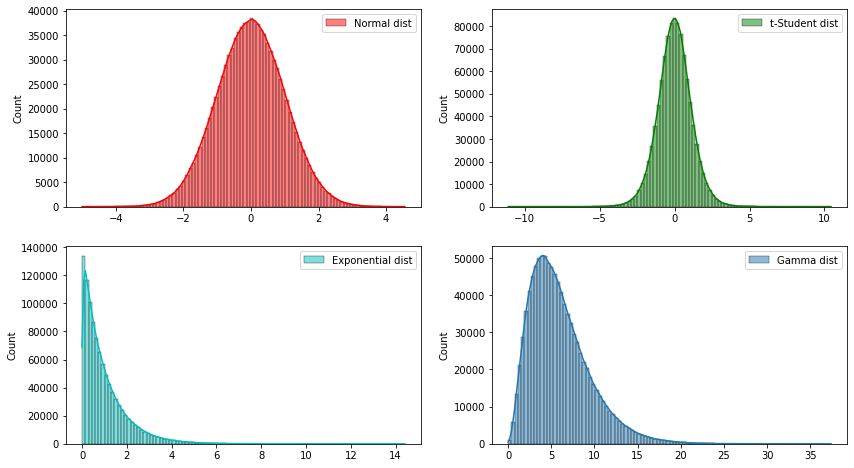

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.histplot(norm_dist, bins=100, ax=axs[0,0], kde=True, color='r', label='Normal dist')
axs[0, 0].legend(loc="upper right")
sns.histplot(student_dist, bins=100, ax=axs[0,1], kde=True, color='g', label='t-Student dist')
axs[0, 1].legend(loc="upper right")
sns.histplot(exp_dist, bins=100, ax=axs[1,0], kde=True, color='c', label='Exponential dist')
axs[1, 0].legend(loc="upper right")
sns.histplot(gamma_dist, bins=100, ax=axs[1,1], kde=True, label='Gamma dist')
axs[1, 1].legend(loc="upper right")
plt.show()

### 1.3 Генератор случайных чисел для дискретного распределения с конечным числом значений (распр.Бернулли, биномиальное,…)

In [6]:
n, p = 10, .5  # number of trials, probability of each trial (flip a coin)
binomial_dist = np.random.binomial(n, p, size=SIZE)

### 1.4 Генератор случайных чисел для дискретного распределения со счетным числом значений (Пуассоновское, геометрическое)

In [7]:
geom_dist = np.random.geometric(p, size=SIZE)
poisson_dist = np.random.poisson(size=SIZE)

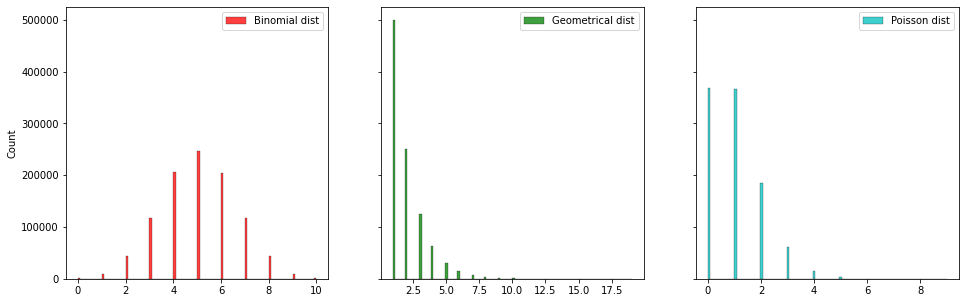

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 5), sharey=True)
sns.histplot(binomial_dist, bins=100, ax=axs[0], color='r', label='Binomial dist')
axs[0].legend(loc="upper right")
sns.histplot(geom_dist, bins=100, ax=axs[1], color='g', label='Geometrical dist')
axs[1].legend(loc="upper right")
sns.histplot(poisson_dist, bins=100, ax=axs[2], color='c', label='Poisson dist')
axs[2].legend(loc="upper right")
plt.show()

---

# 2. EDA COVID-19 Russia & RTS index
Изучим статистику по новым случаям заражения (`new_cases`) в России и цену закрытия индекса RTS (`Close_RTS`)  на период с `31-01-2020` по `01-10-2021`.

### 2.0 Read Data

In [9]:
df = pd.read_csv('russia_COVID.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.fillna(0)
new_cases = df['new_cases'][60:].pct_change().dropna()
close_RTS = df['Close_RTS'][60:].pct_change().dropna()

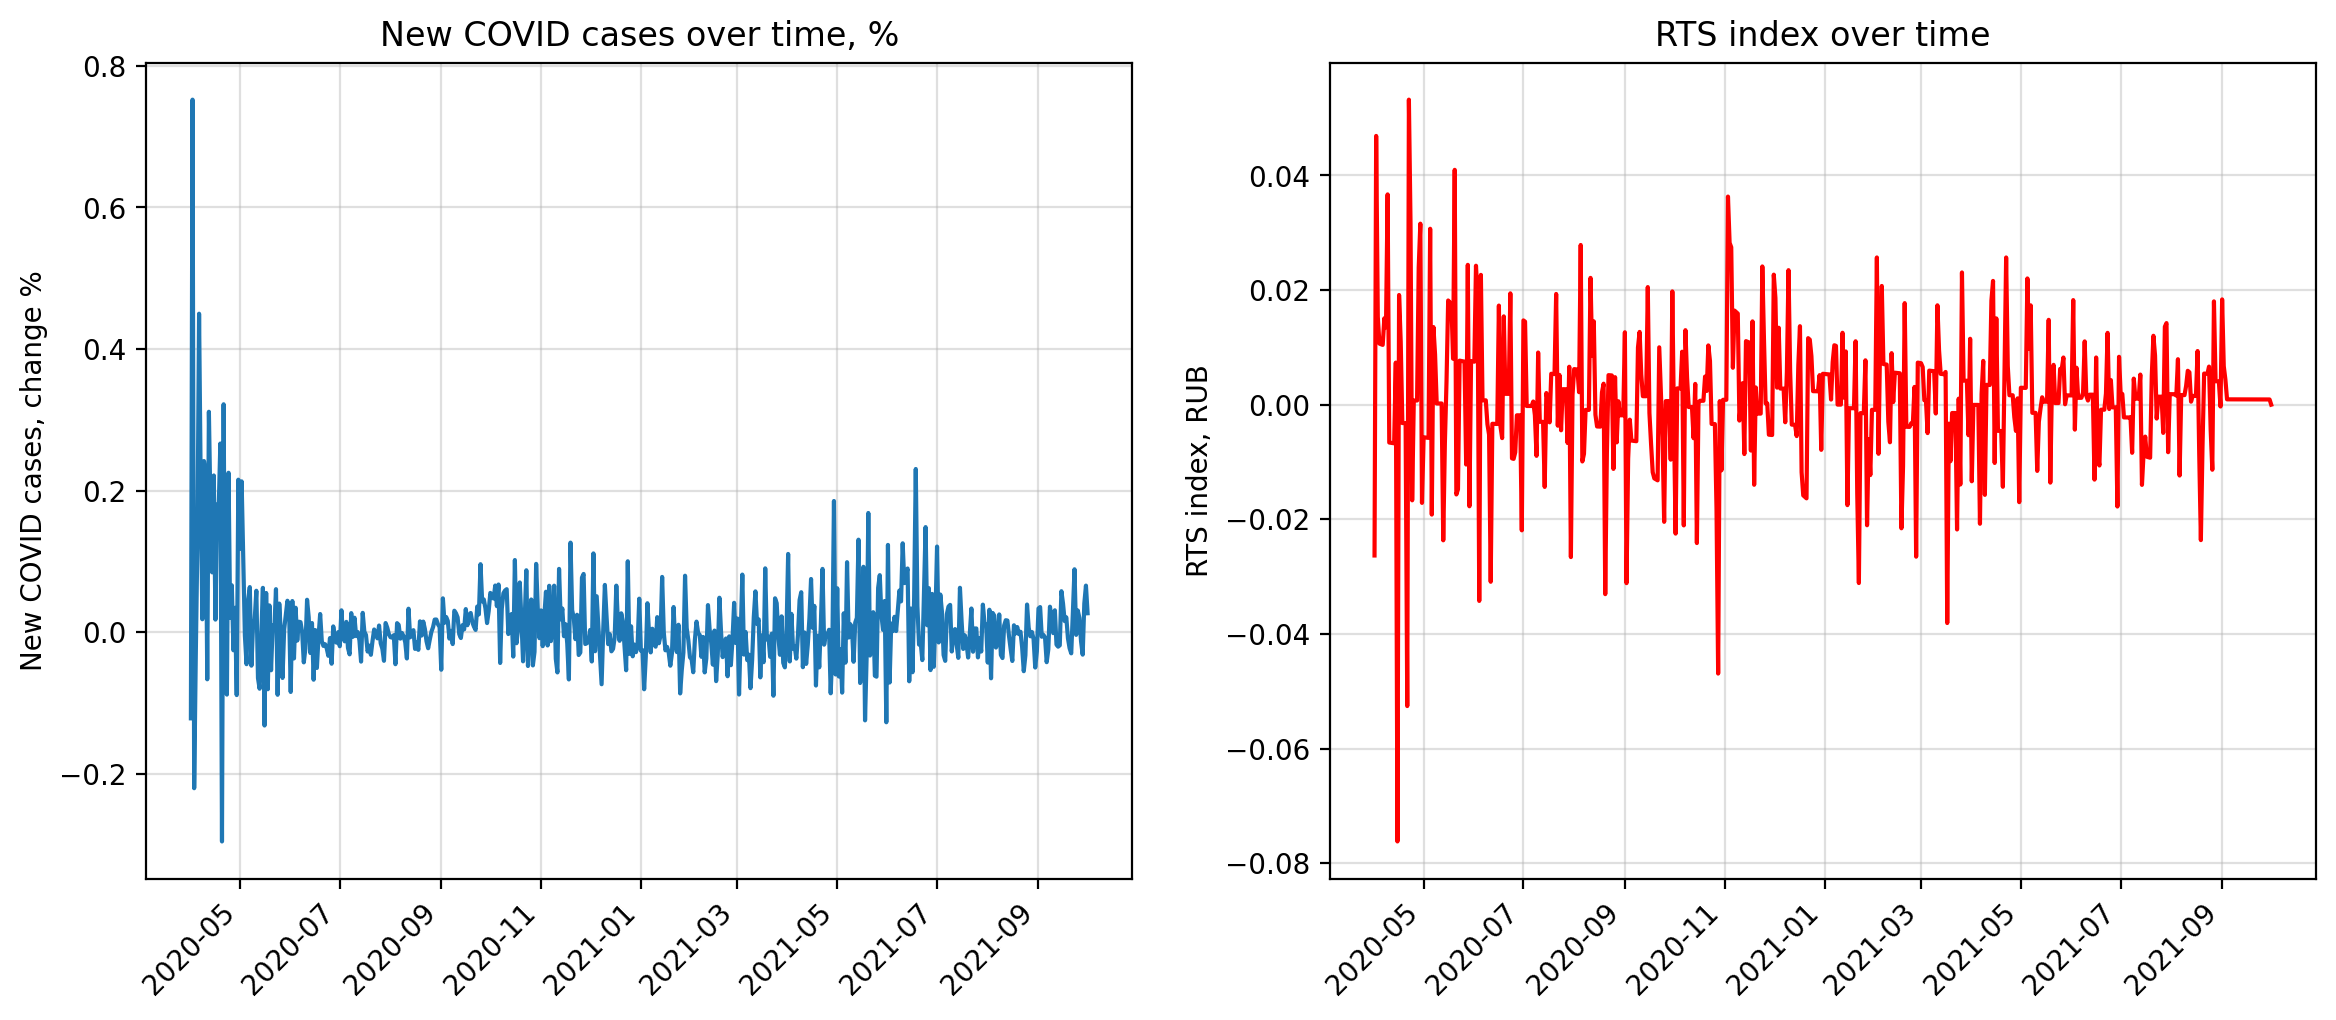

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6), dpi=200)
fig.autofmt_xdate(rotation=45)
axs[0].plot(new_cases)
axs[0].grid(alpha=0.4)
axs[0].set_title('New COVID cases over time, %')
axs[0].set_ylabel('New COVID cases, change %')

axs[1].plot(close_RTS, color='r')
axs[1].grid(alpha=0.4)
axs[1].set_title('RTS index over time')
axs[1].set_ylabel('RTS index, RUB')
plt.show()


#### 2.1.1 Выборочная функция распределения, частота события

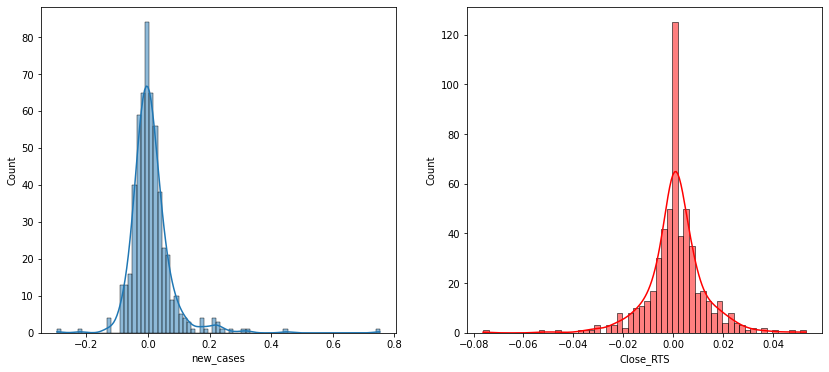

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
sns.histplot(new_cases, kde=True, ax=axs[0])
sns.histplot(close_RTS, kde=True, ax=axs[1], color='r')
plt.show()

#### 2.1.2 Функция плотности

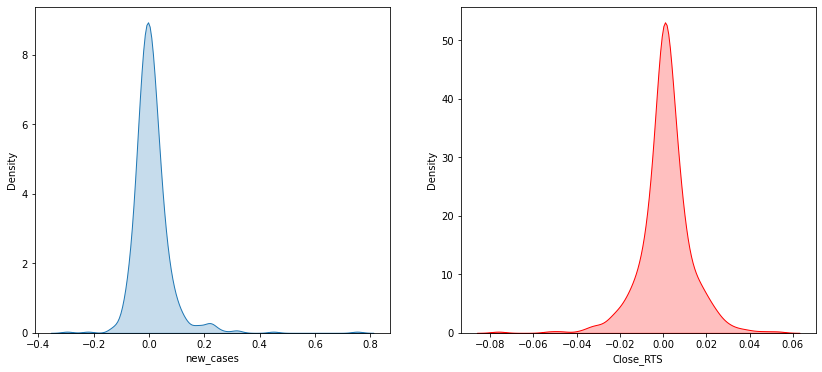

In [12]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
sns.kdeplot(new_cases, ax=axs[0], fill=True)
sns.kdeplot(close_RTS, ax=axs[1], color='r', fill=True)
plt.show()

#### 2.1.4 Выборочные средняя, дисперсия, мода, медиана

Учтем, что число степеней свободы  `n-1 (ddof=1)`.

##### Выборочные характеристики для данных о новых случаях заражения COVID

In [13]:
mean_new_cases = np.mean(new_cases)
std_new_cases = np.std(new_cases, ddof=1)
print('Выборочные характеристики для данных о новых случаях заражения COVID')
print(f'Mean           : {mean_new_cases:.4f}')
print(f'Median         : {np.median(new_cases):.4f}')
print(f'Mode           : {stats.mode(new_cases)[0][0]:.4f}')
print(f'Variance       : {np.var(new_cases, ddof=1):.4f}')
print(f'Std.Deviation  : {std_new_cases:.4f}')

Выборочные характеристики для данных о новых случаях заражения COVID
Mean           : 0.0092
Median         : -0.0004
Mode           : -0.2957
Variance       : 0.0049
Std.Deviation  : 0.0699


##### Выборочные характеристики для данных о цене закрытия индекса RTS

In [14]:
std_RTS = np.std(close_RTS, ddof=1)
mean_RTS = np.mean(close_RTS)
print('Выборочные характеристики для данных о цене закрытия индекса RTS')
print(f'Mean           : {mean_RTS:.4f}')
print(f'Median         : {np.median(close_RTS):.4f}')
print(f'Mode           : {stats.mode(close_RTS)[0][0]:.4f}')
print(f'Variance       : {np.var(close_RTS, ddof=1):.4f}')
print(f'Std.Deviation  : {std_RTS:.4f}')

Выборочные характеристики для данных о цене закрытия индекса RTS
Mean           : 0.0011
Median         : 0.0009
Mode           : -0.0762
Variance       : 0.0001
Std.Deviation  : 0.0117


#### 2.1.5 Aсимметрия, эксцесс
##### Aсимметрия и эксцесс для для данных о новых случаях заражения COVID¶

In [15]:
print(f'Коэфф.эксцесса   :  {stats.kurtosis(new_cases):.2f}')
print(f'Коэфф.асимметрии : {stats.skew(new_cases):.2f}')

Коэфф.эксцесса   :  27.99
Коэфф.асимметрии : 3.33


##### Aсимметрия и эксцесс для цен закрытия индекса RTS

In [16]:
print(f'Коэфф.эксцесса    :  {stats.kurtosis(close_RTS):.2f}')
print(f'Коэфф.асимметрии  : {stats.skew(close_RTS):.2f}')

Коэфф.эксцесса    :  5.95
Коэфф.асимметрии  : -0.55


#### 2.1.6 Квантили, квартили, децили и их выборочные аналоги (порядковые статистики)



Рассмотрим вариативность выборок на примере box plots, иллюстрирующий пределы межквартильного расстояния, значение медианы $Q_{50}$, верхнего $Q_{75}$ и нижнего $Q_{25}$ квантилей.

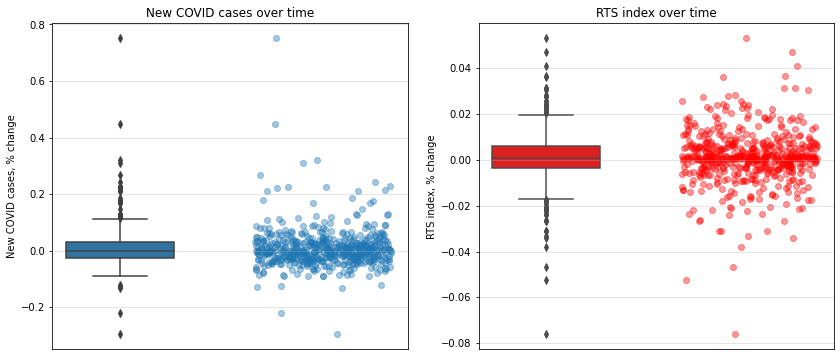

In [17]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
sns.boxplot(data=new_cases, ax=axs[0])
axs[0].scatter(1 + np.random.random(new_cases.shape[0]), new_cases, alpha=0.4)
axs[0].set_xticks([])
axs[0].grid(alpha=0.4)
axs[0].set_title('New COVID cases over time')
axs[0].set_ylabel('New COVID cases, % change')


sns.boxplot(data=close_RTS, ax=axs[1], color='r')
axs[1].scatter(1 + np.random.random(close_RTS.shape[0]), close_RTS, alpha=0.4, color='r')
axs[1].set_title('RTS index over time')
axs[1].set_ylabel('RTS index, % change')
axs[1].grid(alpha=0.4)
axs[1].set_xticks([])
plt.show()

---

### 2.2 Асимптотическая нормальность основных выборочных характеристик. Построение серии гистограмм

#### Визуальные проверки нормальности

In [18]:
SIZE = close_RTS.shape[0]
norm_dist_RTS = std_RTS * np.random.standard_normal(size=SIZE) + mean_RTS
norm_dist_COV = std_new_cases * np.random.standard_normal(size=SIZE) + mean_new_cases

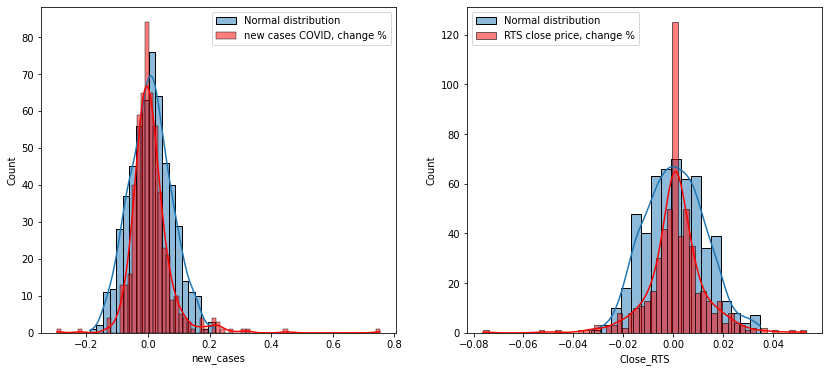

In [19]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))

sns.histplot(norm_dist_COV, kde=True, ax=axs[0], label='Normal distribution')
sns.histplot(new_cases, kde=True, color='r', ax=axs[0], label='new cases COVID, change %')
axs[0].legend()

sns.histplot(norm_dist_RTS, kde=True, ax=axs[1], label='Normal distribution')
sns.histplot(close_RTS, kde=True, color='r', ax=axs[1], label='RTS close price, change %')
axs[1].legend()

#### Q-Q plot

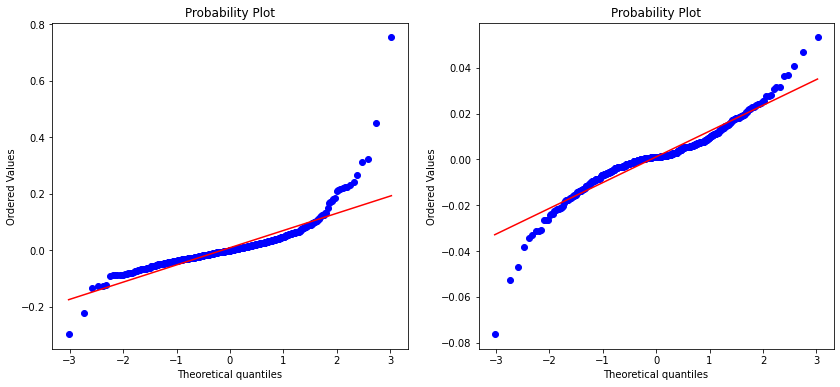

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))
stats.probplot(new_cases, plot = axs[0])
stats.probplot(close_RTS, plot = axs[1])
plt.show()

##### Статистические тесты нормальности
* H0: образец имеет нормальное распределение.
* H1: образец не имеет нормального распределения.

###### 2.2.1 Тест Шапиро-Вилка
The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [21]:
stat, p = stats.shapiro(new_cases)
print(f'p_value = {p:.4f}')

p_value = 0.0000


In [22]:
stat, p = stats.shapiro(close_RTS)
print(f'p_value = {p:.4f}')

p_value = 0.0000


`p-value < 0.05`, отвергаем `H0`

##### 2.2.2 Тест д'Агостино на $K^2$

In [23]:
stat, p = stats.normaltest(new_cases)
print(f'p_value = {p:.4f}')

p_value = 0.0000


In [24]:
stat, p = stats.normaltest(close_RTS)
print(f'p_value = {p:.4f}')

p_value = 0.0000


`p-value < 0.05`, отвергаем `H0`

## Вывод:

Визуальная оценка и оба статистических теста позволяют отвергнуть нулевую гипотезу `Н0` о нормальности распределения. Следовательно тестовый набор данных значительно отличается от нормального.

### 2.3 Построение доверительных интервалов
Рассчитаем значение ошибки по формуле:
$$\pm  z * \frac{\sigma}{\sqrt{n}}$$
* $z$ - критическое значение для 95% доверительного интервала
* $\sigma$ - стандартное отклонение совокупности
* $n$ - число экзмепляров

In [25]:
z_critical = stats.norm.ppf(0.975)

##### 2.3.1 Доверительный интервал для данных о новых случаях заражения COVID¶

In [26]:
margin_of_error = z_critical * (std_new_cases / SIZE ** 0.5)
confidence_interval_COVID = (mean_new_cases - margin_of_error, mean_new_cases + margin_of_error)
print(confidence_interval_COVID)

(0.0033890533567134144, 0.015076010605541933)


##### 2.3.2 Доверительный интервал для данных о значении индекса RTS

In [27]:
margin_of_error = z_critical * (std_RTS / SIZE ** 0.5)
confidence_interval_RTS = (mean_RTS - margin_of_error, mean_RTS + margin_of_error)
print(confidence_interval_RTS)

(0.00010923415301862223, 0.0020736954191300683)


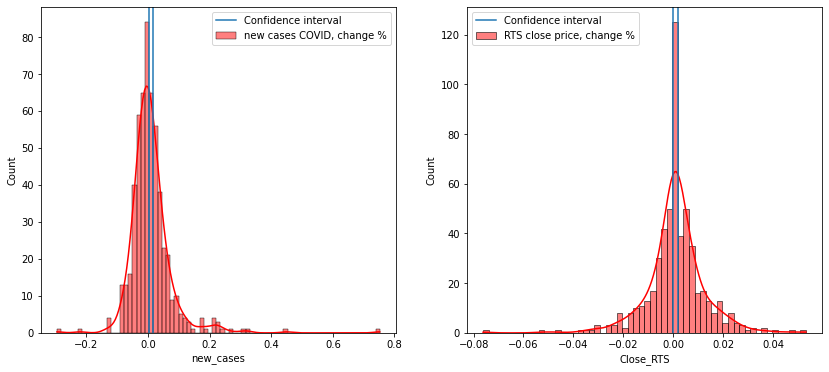

In [28]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 6))

sns.histplot(new_cases, kde=True, color='r', ax=axs[0], label='new cases COVID, change %')
axs[0].axvline(confidence_interval_COVID[0], label='Confidence interval')
axs[0].axvline(confidence_interval_COVID[1])
axs[0].legend()

sns.histplot(close_RTS, kde=True, color='r', ax=axs[1], label='RTS close price, change %')
axs[1].axvline(confidence_interval_RTS[0], label='Confidence interval')
axs[1].axvline(confidence_interval_RTS[1])
axs[1].legend()

---